# PyTorch Custom Datasets
#coding/python #coding/deeplearning

- [YT: Learn PyTorch for Deep Learing](https://www.youtube.com/watch?v=Z_ikDlimN6A&t=71017s)
- [LearnPyTorch.io](https://www.learnpytorch.io/03_pytorch_computer_vision/)

## 01. Introduction to custom datasets
- preprocessing datasets to be used in PyTorch

### PyTorch Domain Libraries
Pytorch has existing and customizable **data loading functionns** that can be used depending on the data you are working on:
- TorchVision
- TorchAudio
- TorchText
- TorchRec

| Problem Space | Datasets |
| --- | --- |
| Vision | `torchvision.datasets` |
| Text | `torchtext.datasets` |
| Audio | `torchaudio.datasets` |
| Recom System | `torchrec.datasets` |
| **Bonus** | `TorchData` |

### What we're going to build
FoodVision Mini

### Outline
- getting custom dataset
- prepare and visualize data
- transform data for use with a model
- loading custom data (with pre-built functions and custom functions)
- comparing models with/without data augmentation
- making predictions on custom data

###

In [3]:
# Import dependencies, check version
import torch
from torch import nn

torch.__version__

'2.0.0+cu117'

In [4]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## 02. Downloading a custom dataset of pizza, steak and sushi images

Sample dataset will be from Food101 dataset
- Original: 101 classes, 750 train img, 250 test img
- Reduced: 3 classes, 75 train img, 25 test img

### STEP 01: GET DATA
Downloading dataset from GitHub

In [5]:
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download and prep
if image_path.is_dir():
    print(f"{image_path} dir already exists.")
else:
    print(f"{image_path} dir does not exist, creating one") 
    image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak, sushi data
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print("Downloading pizza, steak, sushi data...")
    f.write(request.content)

# Unzip
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
    print("Unzipping pizza, steak, sushi data...")
    zip_ref.extractall(image_path)


data/pizza_steak_sushi dir does not exist, creating one
Unzipping pizza, steak, sushi data...


## 03. Becoming one with the data

### Standard image classification data format
```
pizza_steak_sushi/  # overall dataset folder
  train/            # training images
    pizza/          # class name as folder name
      img1
      img2
    steak/
      img3
      img4
  test/             # testing images
    pizza/
    steak/
```

There are existing DataLoaders in pytorch documentation (Docs>Datasets>...) which describes the file structure of data which will be loaded.

### STEP 02: DATA PREPARATION & EXPLORATION

In [7]:
import os
def walk_through_dir(dir_path):
    """Walks through dir_path returning its contents"""
    for dirpath, dirnames, filenames, in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.


In [8]:
# Setup train and test paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

#### 2.1 Visualizing and image
1. Get all image paths
2. Pick random image using `random.choice()`
3. Get image class name using `pathlib.Path.parent.stem`
4. open image using `PIL`
5. show image and print metadata

Random image path: data/pizza_steak_sushi/train/pizza/3589437.jpg
Image class: pizza
h: 288
w: 512


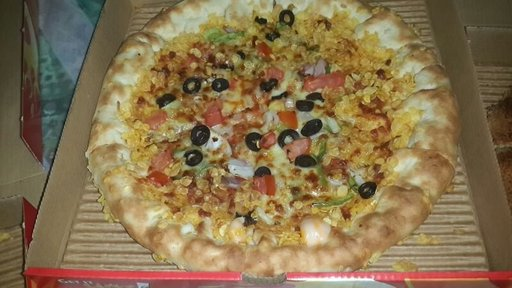

In [12]:
import random
from PIL import Image

# 0. Set seed
# random.seed(42)

# 1. Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg")) # What is glob?

# 2. Pick a random image
random_image_path = random.choice(image_path_list) # pass in a list

# 3. Get image class from path name
image_class = random_image_path.parent.stem

# 4. Open image 
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"h: {img.height}")
print(f"w: {img.width}")
img


#### 2.2 Visualize using `matplotlib`

Text(0.5, 1.0, 'Image class: pizza | Image shape: (288, 512, 3)')

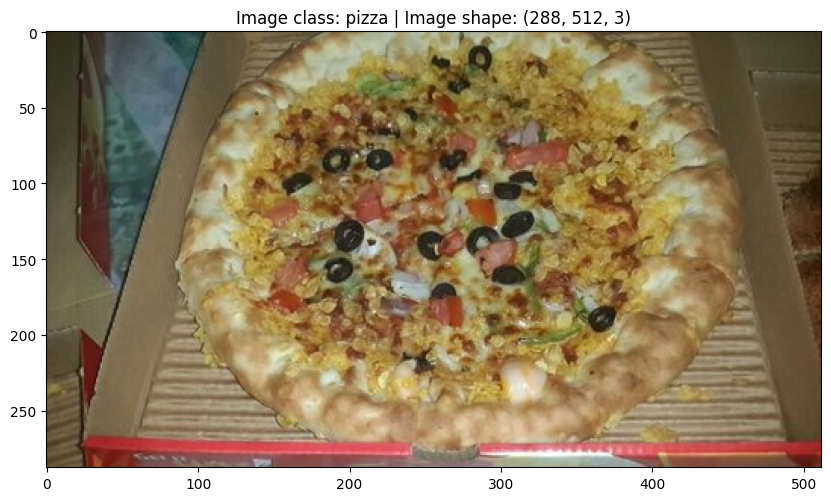

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Turn image into an array
img_as_array = np.asarray(img)

# Plot the image
plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape}")
plt.axis(False)


## 04. Turning images into tensors



### STEP 03: TRANSFORMING DATA
For data to be used with PyTorch:
1. Turn target data into tensors
2. Turn it into a `torch.utils.data.Dataset` (call it **Dataset**)
3. Turn it into a `torch.utils.data.DataLoader` (call it **DataLoader**)

https://www.youtube.com/watch?v=Z_ikDlimN6A&t=74323s
https://pytorch.org/tutorials/beginner/data_loading_tutorial.html

## 05. Creating image DataLoaders


## 06. Creating a custom dataset class (overview)


## 07. Writing a custom dataset class from scratch


## 08. Turning custom datasets into DataLoaders


## 09. Data augmentation


## 10. Building a baseline model


## 11. Getting a summary of our model with torchinfo


## 12. Creating training and testing loop functions


## 13. Plotting model 0 loss curves


## 14. Overfitting and underfitting


## 15. Plotting model 1 loss curves


## 16. Plotting all the loss curves


## 17. Predicting on custom data